In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [20]:
df = pickle.load( open('models_dataframe.p', 'rb'))

In [21]:
df['bow_ngram'] = df['bow'] + ',' + df['ngram_range']
df.columns

Index(['bow', 'ucf_k', 'ngram_range', 'models', 'chi2_k', 'accuracy',
       'num_feature', 'bow_ngram'],
      dtype='object')

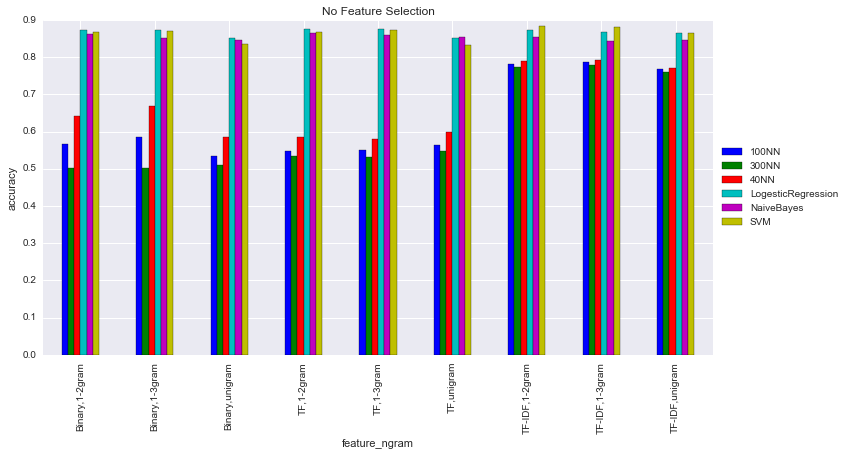

In [22]:
# No Feature selection (Use all features for each ngram range)
query_str = "chi2_k == num_feature & ucf_k == num_feature"
all_feat_df = df.query(query_str).pivot(
    index='bow_ngram',columns='models', values='accuracy')
axes = all_feat_df.plot.bar(figsize=(12,6))
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),
  ncol=1, fancybox=True, shadow=True)
plt.ylabel('accuracy')
plt.xlabel('feature_ngram')
plt.title('No Feature Selection')
plt.savefig('no_feature_select.png', bbox_inches='tight')

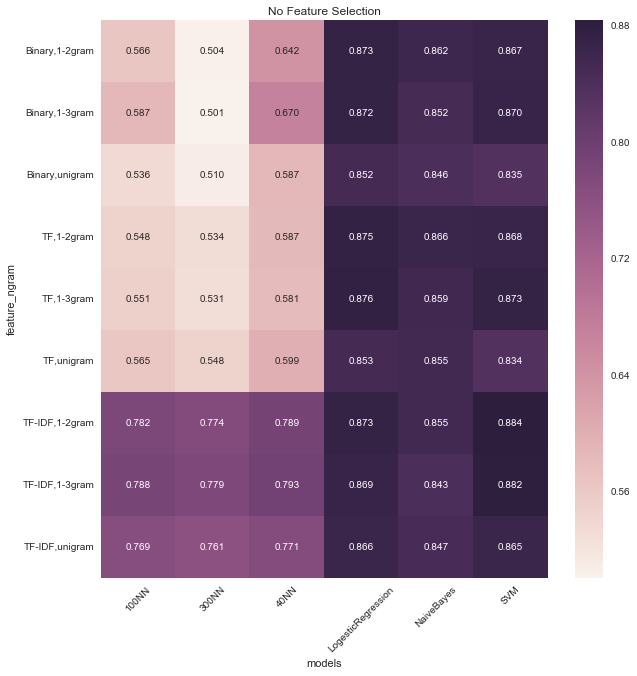

In [56]:
# No Feature Selection heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(all_feat_df, annot=True, fmt='.3f')
for item in hm.get_xticklabels():
    item.set_rotation(45)
plt.ylabel('feature_ngram')
plt.title('No Feature Selection')
plt.savefig('no_feature_select_heatmap.png', bbox_inches='tight')

In [24]:
# best result with all features
temp = df.query(query_str)
temp.loc[temp['accuracy'].idxmax()]

bow                    TF-IDF
ucf_k                  223688
ngram_range           1-2gram
models                    SVM
chi2_k                 223688
accuracy               0.8845
num_feature            223688
bow_ngram      TF-IDF,1-2gram
Name: 3497, dtype: object


Best result for NaiveBayes:
bow                    TF
ucf_k               50000
ngram_range       1-3gram
models         NaiveBayes
chi2_k             599287
accuracy            0.882
num_feature        599287
bow_ngram      TF,1-3gram
Name: 2029, dtype: object

Best result for SVM:
bow                    TF-IDF
ucf_k                   70000
ngram_range           1-2gram
models                    SVM
chi2_k                 223688
accuracy              0.88625
num_feature            223688
bow_ngram      TF-IDF,1-2gram
Name: 3339, dtype: object

Best result for LogesticRegression:
bow                        TF-IDF
ucf_k                       25000
ngram_range               1-3gram
models         LogesticRegression
chi2_k                     599287
accuracy                  0.88175
num_feature                599287
bow_ngram          TF-IDF,1-3gram
Name: 2843, dtype: object

Best result for 300NN:
bow                    TF-IDF
ucf_k                   25000
ngram_range           1-3gram


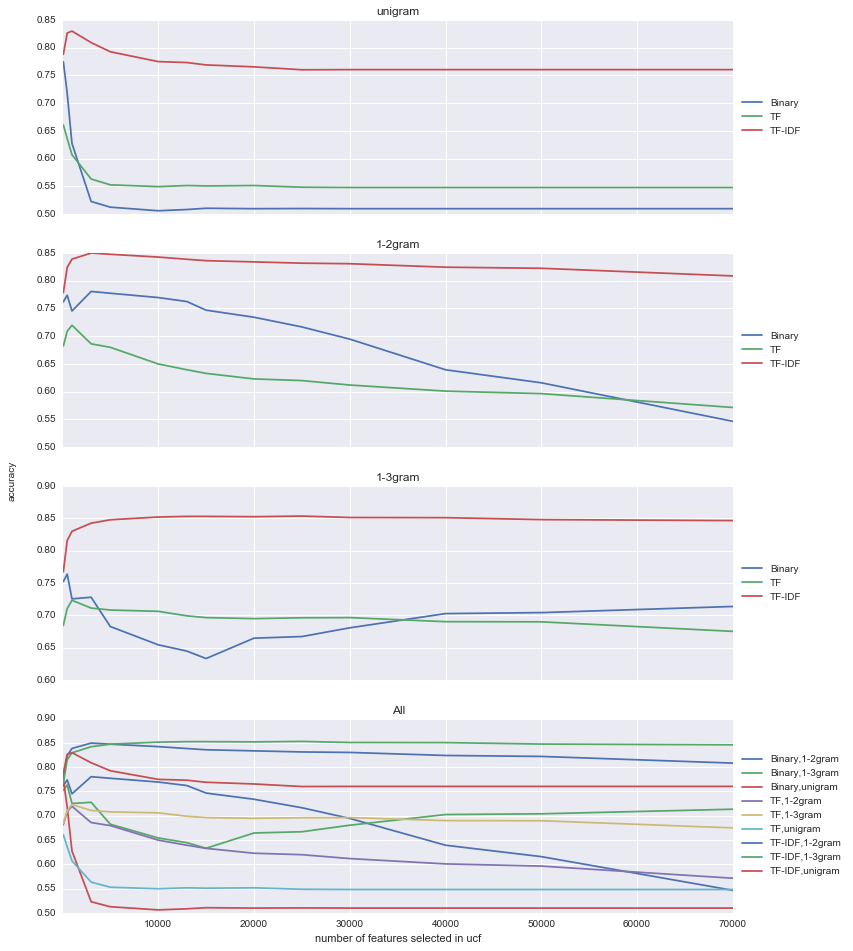

In [44]:
# Unsupervised Collection Frequency Feature Selection
f, axarr = plt.subplots(4, 1,sharex=True, figsize=(12, 16))
f.subplots_adjust(hspace=.2)
f.text(0.06, 0.5, 'accuracy', va='center', rotation='vertical')
# f.text(0.5, 0.04, 'common X', ha='center')

for m in ['NaiveBayes', 'SVM', 'LogesticRegression','300NN']:

    for a in axarr : a.clear()
    axarr[0].set_title('unigram')
    axarr[1].set_title('1-2gram')
    axarr[2].set_title('1-3gram')
    axarr[3].set_title('All')

    # 'chi2_k == num_feature' means withot chi2 FS and 
    # 'ucf_k != num_feature' only show result that use ucf FS
    # unigram
    df.query("models == @m & ngram_range == 'unigram' & \
             chi2_k == num_feature & ucf_k != num_feature").pivot(
        index='ucf_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[0])
    
    # 1-2gram
    df.query("models == @m & ngram_range == '1-2gram' & \
             chi2_k == num_feature & ucf_k != num_feature").pivot(
        index='ucf_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[1])

    # 1-3gram
    df.query("models == @m & ngram_range == '1-3gram' & \
             chi2_k == num_feature & ucf_k != num_feature").pivot(
        index='ucf_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[2])
    
    # All ngram
    df.query("models == @m & chi2_k == num_feature & \
             ucf_k != num_feature").pivot(
        index='ucf_k', 
        columns='bow_ngram', 
        values='accuracy').plot(ax=axarr[3])
    
    for a in axarr : 
        a.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
        a.set_xlabel('')
    
    axarr[3].set_xlabel('number of features selected in ucf')
    
    # print best result for each model
    print("\nBest result for {0} with UCF:".format(m))
    temp = df.query("models == @m & chi2_k == num_feature & \
             ucf_k != num_feature")
    print(temp.loc[temp['accuracy'].idxmax()])
    
    plt.savefig(m + '_ucf.png', bbox_inches='tight')

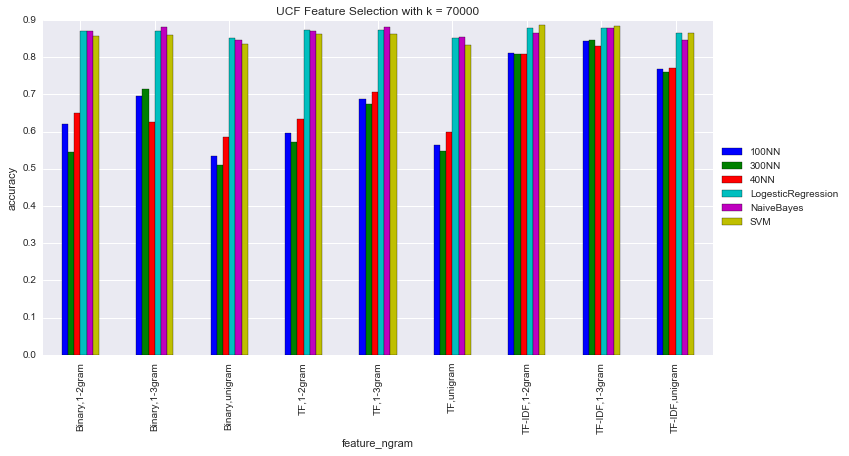

In [26]:
#UCF bar chart
ucf_df = df.query("ucf_k == 70000 & chi2_k == num_feature").pivot(
    index='bow_ngram', 
    columns='models', 
    values='accuracy')
axes = ucf_df.plot.bar(figsize=(12,6))
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),
  ncol=1, fancybox=True, shadow=True)
plt.ylabel('accuracy')
plt.xlabel('feature_ngram')
plt.title('UCF Feature Selection with k = 70000')
plt.savefig('ucf(70000)_fs.png', bbox_inches='tight')

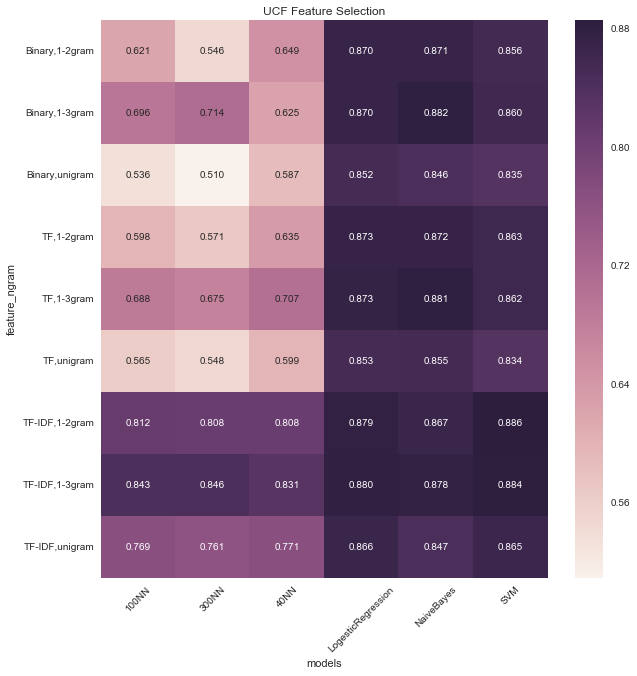

In [55]:
# UCF heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(ucf_df, annot=True,fmt=".3f")
for item in hm.get_xticklabels():
    item.set_rotation(45)
plt.ylabel('feature_ngram')
plt.title('UCF Feature Selection')
plt.savefig('ucf(70000)_heatmap.png', bbox_inches='tight')

In [28]:
# best result in UCF feature selection 
query_str = "chi2_k == num_feature"
temp = df.query(query_str)
temp.loc[temp['accuracy'].idxmax()]

bow                    TF-IDF
ucf_k                   70000
ngram_range           1-2gram
models                    SVM
chi2_k                 223688
accuracy              0.88625
num_feature            223688
bow_ngram      TF-IDF,1-2gram
Name: 3339, dtype: object


Best result for NaiveBayes:
bow                    Binary
ucf_k                  599287
ngram_range           1-3gram
models             NaiveBayes
chi2_k                  40000
accuracy              0.95075
num_feature            599287
bow_ngram      Binary,1-3gram
Name: 1143, dtype: object

Best result for SVM:
bow                    TF-IDF
ucf_k                  599287
ngram_range           1-3gram
models                    SVM
chi2_k                  40000
accuracy               0.9205
num_feature            599287
bow_ngram      TF-IDF,1-3gram
Name: 3567, dtype: object

Best result for LogesticRegression:
bow                        TF-IDF
ucf_k                      223688
ngram_range               1-2gram
models         LogesticRegression
chi2_k                      50000
accuracy                  0.89725
num_feature                223688
bow_ngram          TF-IDF,1-2gram
Name: 3544, dtype: object

Best result for 300NN:
bow                    TF-IDF
ucf_k                   2509

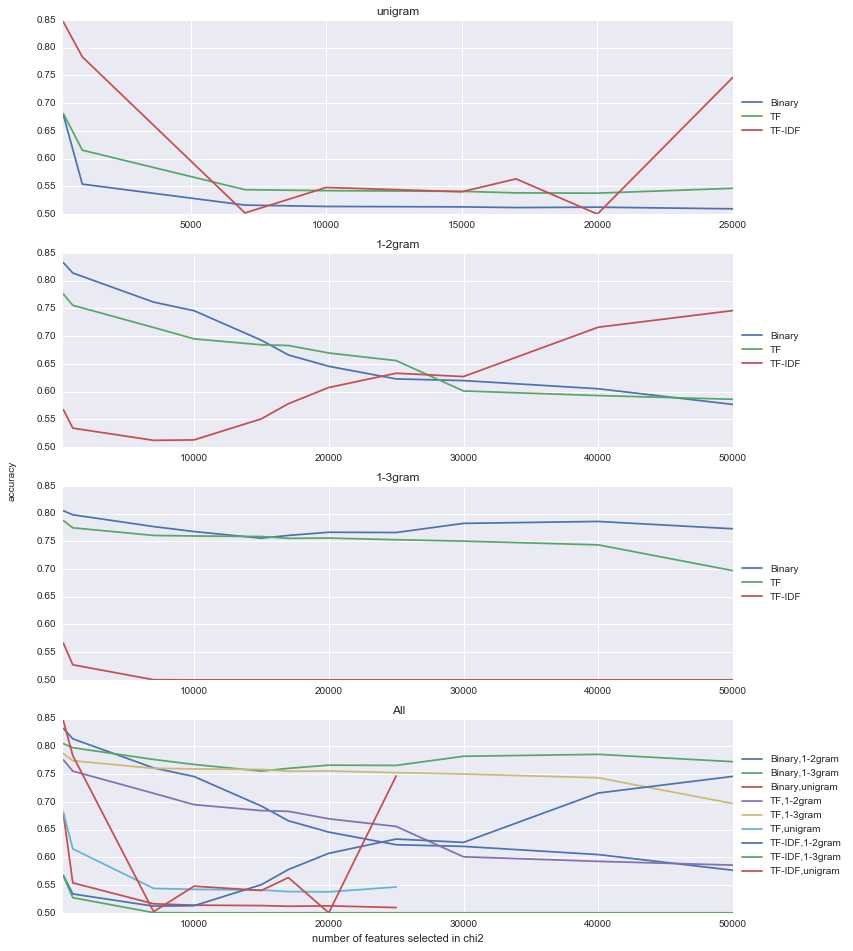

In [45]:
# CHI2 Feature Selection
f, axarr = plt.subplots(4, 1,figsize=(12, 16))
f.subplots_adjust(hspace=.2)
f.text(0.06, 0.5, 'accuracy', va='center', rotation='vertical')

for m in ['NaiveBayes', 'SVM', 'LogesticRegression','300NN']:

    for a in axarr : a.clear()
    axarr[0].set_title('unigram')
    axarr[1].set_title('1-2gram')
    axarr[2].set_title('1-3gram')
    axarr[3].set_title('All')

    # 'ucf_k == num_feature' means withot UCF FS and 
    # 'chi2_k != num_feature' only show result that use chi2 FS
    # unigram
    df.query("models == @m & ngram_range == 'unigram' & \
             chi2_k != num_feature & ucf_k == num_feature").pivot(
        index='chi2_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[0])

    # 1-2gram
    df.query("models == @m & ngram_range == '1-2gram' & \
             chi2_k != num_feature & ucf_k == num_feature").pivot(
        index='chi2_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[1])

    # 1-3gram
    df.query("models == @m & ngram_range == '1-3gram' & \
             chi2_k != num_feature & ucf_k == num_feature").pivot(
        index='chi2_k', 
        columns='bow', 
        values='accuracy').plot(ax=axarr[2])

    # All
    df.query("models == @m & chi2_k != num_feature & \
             ucf_k == num_feature").pivot(
        index='chi2_k', 
        columns='bow_ngram', 
        values='accuracy').plot(ax=axarr[3])
    
    for a in axarr : 
        a.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
        a.set_xlabel('')
    
    axarr[3].set_xlabel('number of features selected in chi2')
    
    # print best result for each model
    print("\nBest result for {0} with CHI2:".format(m))
    temp = df.query("models == @m & chi2_k != num_feature & \
             ucf_k == num_feature")
    print(temp.loc[temp['accuracy'].idxmax()])
    
    f.savefig(m + '_chi2.png', bbox_inches='tight')

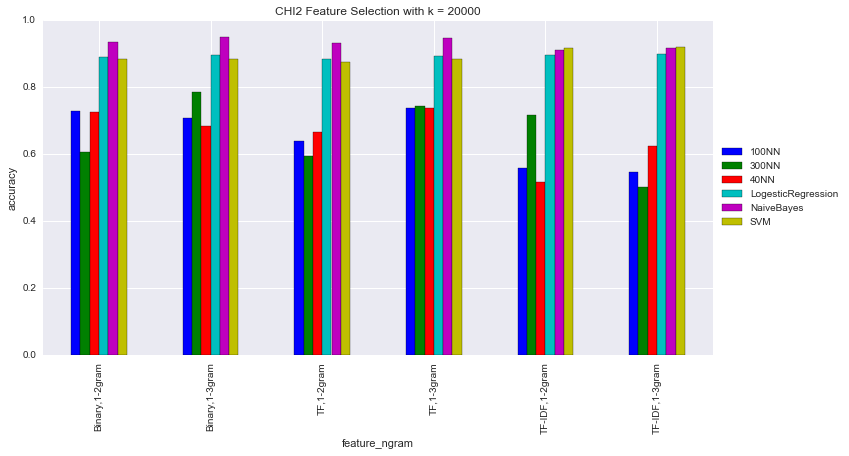

In [38]:
# CHI2 bar chart
chi2_df = df.query("ucf_k == num_feature & chi2_k == 40000").pivot(
    index='bow_ngram', 
    columns='models', 
    values='accuracy')
axes = chi2_df.plot.bar(figsize=(12,6))
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),
  ncol=1, fancybox=True, shadow=True)
plt.ylabel('accuracy')
plt.xlabel('feature_ngram')
plt.title('CHI2 Feature Selection with k = 20000')
plt.savefig('chi2(40000)_fs.png', bbox_inches='tight')

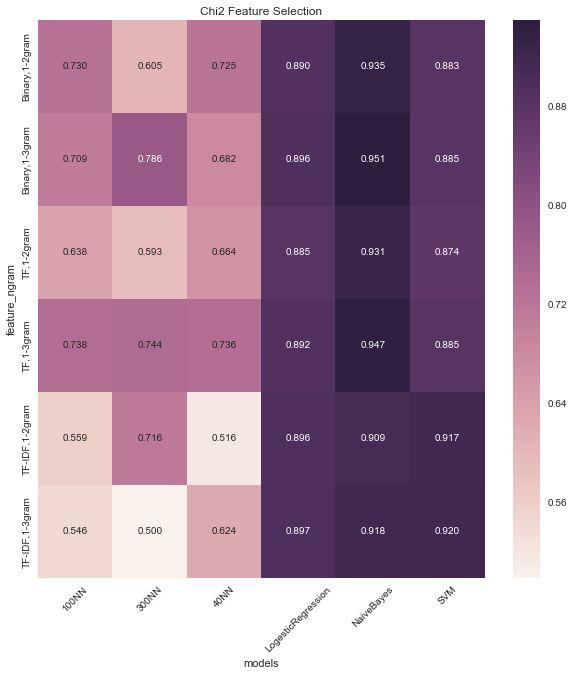

In [54]:
# CHI2 heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(chi2_df, annot=True,fmt=".3f")
for item in hm.get_xticklabels():
    item.set_rotation(45)
plt.ylabel('feature_ngram')
plt.title('Chi2 Feature Selection')
plt.savefig('chi2(40000)_heatmap.png', bbox_inches='tight')

In [32]:
# best result in Chi2 feature selection 
query_str = "ucf_k == num_feature"
temp = df.query(query_str)
temp.loc[temp['accuracy'].idxmax()]

bow                    Binary
ucf_k                  599287
ngram_range           1-3gram
models             NaiveBayes
chi2_k                  40000
accuracy              0.95075
num_feature            599287
bow_ngram      Binary,1-3gram
Name: 1143, dtype: object

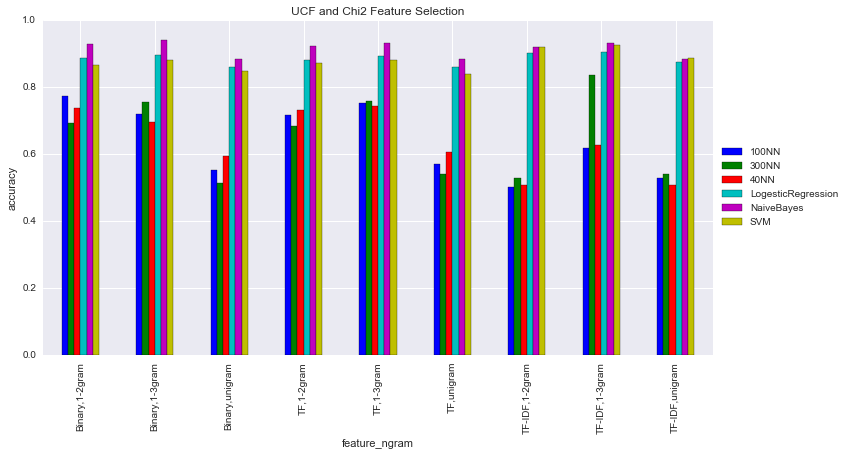

In [33]:
# Combined ucf & chi2 bar chart
query_str = "ucf_k == 70000 & chi2_k == 15000"
ucf_chi2_df = df.query("ucf_k == 70000 & chi2_k == 15000").pivot(
    index='bow_ngram', 
    columns='models', 
    values='accuracy')
axes = ucf_chi2_df.plot.bar(figsize=(12,6))
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),
  ncol=1, fancybox=True, shadow=True)
plt.ylabel('accuracy')
plt.xlabel('feature_ngram')
plt.title('UCF and Chi2 Feature Selection')
plt.savefig('ucf(70000)&chi2(15000).png', bbox_inches='tight')

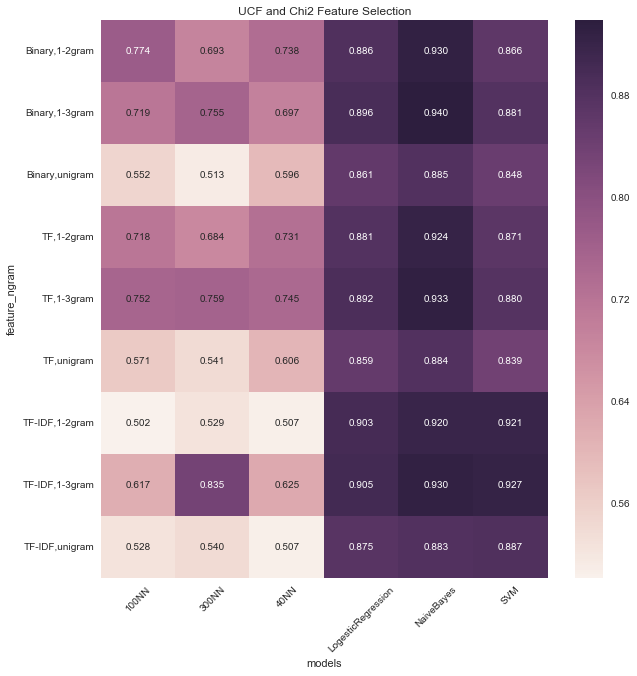

In [53]:
# Combined ucf & chi2 heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(ucf_chi2_df, annot=True,fmt=".3f")
for item in hm.get_xticklabels():
    item.set_rotation(45)
plt.ylabel('feature_ngram')
plt.title('UCF and Chi2 Feature Selection')
plt.savefig('ucf(70000)&chi2(15000)_heatmap.png', bbox_inches='tight')

In [35]:
# best result in UCF and Chi2 feature selection 
temp = df.query(query_str)
temp.loc[temp['accuracy'].idxmax()]

bow                    Binary
ucf_k                   70000
ngram_range           1-3gram
models             NaiveBayes
chi2_k                  15000
accuracy              0.94025
num_feature            599287
bow_ngram      Binary,1-3gram
Name: 964, dtype: object

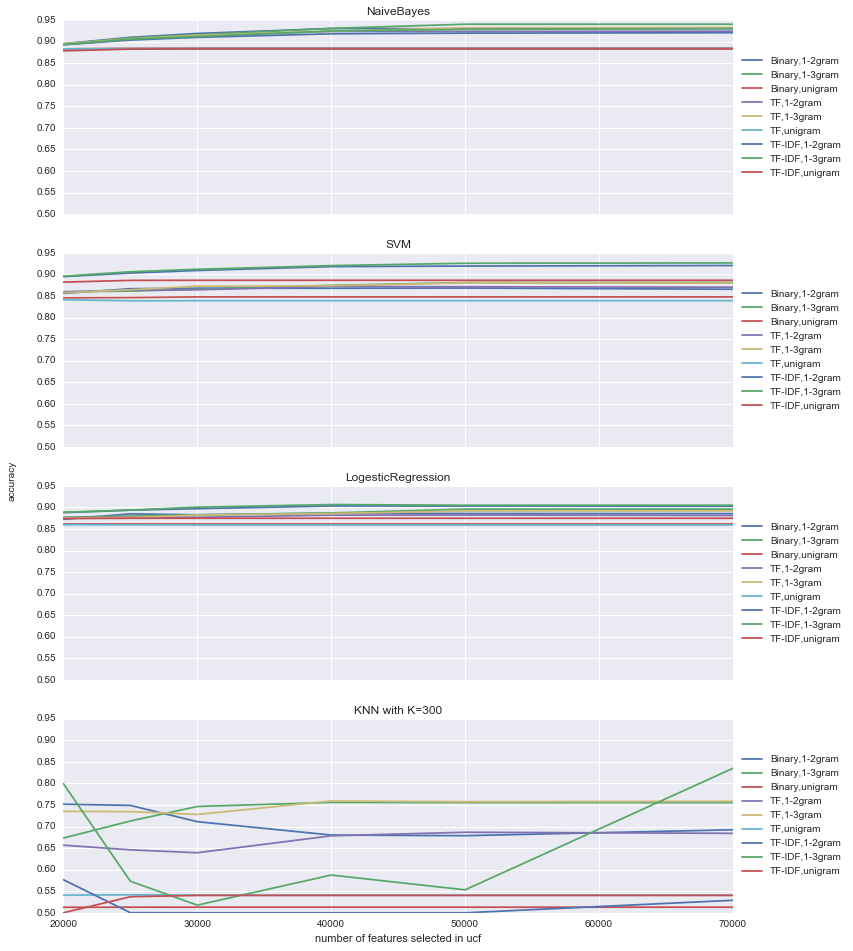

In [36]:
# Relation between accuracy and number of ucf features with chi2_k=15000
f, axarr = plt.subplots(4, 1,sharex=True, sharey=True,figsize=(12, 16))
f.subplots_adjust(hspace=.2)
f.text(0.06, 0.5, 'accuracy', va='center', rotation='vertical')

axarr[0].set_title('NaiveBayes')
axarr[1].set_title('SVM')
axarr[2].set_title('LogesticRegression')
axarr[3].set_title('KNN with K=300')

for i, m in enumerate(['NaiveBayes', 'SVM', 'LogesticRegression','300NN']):
    df.query("chi2_k == 15000 and ucf_k != num_feature & \
             models == @m").pivot(
        index='ucf_k', 
        columns='bow_ngram', 
        values='accuracy').plot(ax=axarr[i])
    
    axarr[i].legend(loc='center left', bbox_to_anchor=(1, 0.5),
      ncol=1, fancybox=True, shadow=True)
    axarr[i].set_xlabel('')

axarr[3].set_xlabel('number of features selected in ucf')
plt.savefig('ucf_chi(15000).png', bbox_inches='tight')